##Exercise 1

In [1]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
pair1 = ["What you do defines you", "Your deeds define you"] # given in the question
pair2 = ["Once upon a time there lived a king.", "Who is your queen?"]
pair3 = ["He is desperate", "Is he not desperate?"]

def get_wrds(txt): # a function to process the text and get the unique words
  lemmatizer = WordNetLemmatizer()
  w_lst = []
  for w in word_tokenize(txt): # tokenizing
    a = lemmatizer.lemmatize(w.lower()) # lemmatizing
    if a not in w_lst:
      w_lst.append(a) # appending the unique words
  return set(w_lst)

In [3]:
p1_0_wrds = get_wrds(pair1[0]) # getting the words
p1_1_wrds = get_wrds(pair1[1])
print(p1_0_wrds) # checking the words
print(p1_1_wrds)

{'you', 'what', 'defines', 'do'}
{'deed', 'your', 'define', 'you'}


In [4]:
intersection = p1_0_wrds.intersection(p1_1_wrds)
union = p1_0_wrds.union(p1_1_wrds)
jacc_sim_idx = len(intersection) / len(union)  # printing the Jaccard similarity index, it is just the ratio of common words in the whole sample space
print(jacc_sim_idx)

0.14285714285714285


# Exercise 2

In [5]:
!pip install python-levenshtein


In [6]:
import Levenshtein

txt1 = "I cannot believe what he said"
txt2 = "I believe it is not what he said"

leve_dist = Levenshtein.distance(txt1, txt2) # calculating the distance
print("Levenshtein distance:",leve_dist)

Levenshtein distance: 15


### Levenshtein distance = 15, this means that they are not quite similar, in other words, it would take 15 replacements in one string to make the both strings similar

## Exercise 3

In [7]:
!pip install spacy


In [8]:
import spacy


nlp = spacy.load('en_core_web_md') # loading the model

with open('/content/Europe_Covid.txt', 'r') as file: # reading the file
    eurp_covd_txt = file.read()

eurp_covd_txt[:500] # checking the data

'European countries are reporting record numbers of Covid-19 cases as the continent prepares for the pandemic to intensify through winter.Those affected include Europe\'s political class. Polish President Andrzej Duda tested positive for Covid-19 on Friday, according to a tweet from Presidential Minister Blazej Spychalski Saturday. Duda said that he was feeling well, was asymptomatic and would continue working in isolation. "As you can see, I am full of strength. I hope it will stay this way. Howe'

In [9]:
doc = nlp(eurp_covd_txt)


def sim_wrds(x): # the function to find similar words using Spacy

    token = nlp(x) # creating a token

    temp_lst = []
    for i in nlp.vocab:
        if i.has_vector and i.is_lower and i.is_alpha:
            sim = token.similarity(i) # calculating similarity score
            temp_lst.append((i.text, sim))
    temp_lst = sorted(temp_lst, key=lambda x: x[1], reverse=True) # sorting in descending order
    return temp_lst[:5] # returning only first 5 elements

In [10]:
govt = sim_wrds('government') # getting similar words for "government" along with similarity score
govt

[('government', 1.0),
 ('political', 0.7037084003727787),
 ('nations', 0.6999612992386715),
 ('public', 0.681839975275695),
 ('restrictions', 0.6516883158384302)]

In [11]:
curfew = sim_wrds('curfew') # getting similar words for "curfew" along with similarity score
curfew

[('curfew', 1.0),
 ('quarantine', 0.5376230697268825),
 ('restrictions', 0.4298128728936229),
 ('rules', 0.3932098170909571),
 ('pm', 0.34234574310348087)]

## Exercise 4

In [12]:
from textblob import TextBlob

blob = TextBlob(eurp_covd_txt)# creating a TextBlob object


sentiment = blob.sentiment.polarity # calculating the sentiment and subjectivity scores
subjectivity = blob.sentiment.subjectivity


print("Sentiment Score:",sentiment)
print("Subjectivity Score:",subjectivity)


Sentiment Score: 0.04992382294707877
Subjectivity Score: 0.3476432095036746


##Exercise 5

case 6
Friday 5
said 5
new 5
country 4


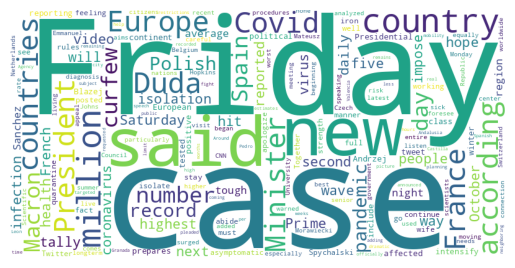

In [13]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wrd_freqs = WordCloud(stopwords=STOPWORDS).process_text(eurp_covd_txt) # cleaning the text using inbuilt WordCloud method
srtd_wrds = dict(sorted(wrd_freqs.items(), key=lambda item: item[1], reverse=True))

count = 0
for k, v in srtd_wrds.items(): # printing top 5 most frequent words
    print(k, v)
    count += 1
    if count == 5:
        break


wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wrd_freqs) # creating the WordCloud


plt.imshow(wordcloud)
plt.axis("off")
plt.show()


##Exercise 6

In [14]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
nlp = spacy.load('en_core_web_sm') # loading the Spacy model
# I have referred the notebook from the shared NLP google drive for this exercise
doc = nlp(eurp_covd_txt) # the Spacu document
sentences = [i.text.strip() for i in doc.sents]

sent_org = {k: v for v, k in enumerate(sentences)} # the organizer to store sentences

tf_idf_vectorizer = TfidfVectorizer(min_df=2,  max_features=None,
                                    strip_accents='unicode',
                                    analyzer='word',
                                    token_pattern=r'\w{1,}',
                                    ngram_range=(1, 3),
                                    use_idf=True, smooth_idf=True,
                                    sublinear_tf=True,
                                    stop_words='english')


tf_idf_vectorizer.fit(sentences) # vectorizing the sentences
vects = tf_idf_vectorizer.transform(sentences)

In [16]:
sent_scrs = np.array(vects.sum(axis=1)).ravel() # getting sentence scores


tp_sents = [sentences[ind] for ind in np.argsort(sent_scrs, axis=0)[::-1][:4]] # getting top 3 lines


tp_sents

["Duda's diagnosis comes as the country reported 13,632 new cases Friday, the highest daily tally since the pandemic began.",
 'Polish President Andrzej Duda tested positive for Covid-19 on Friday, according to a tweet from Presidential Minister Blazej Spychalski Saturday.',
 '"The second wave has hit the entire Europe equally," Prime Minister Mateusz Morawiecki said Friday.',
 "Spain's Prime Minister Pedro Sanchez pleaded with the public to limit their mobility and help fight a second wave, during a speech on Friday."]

In [17]:
mapd_sents = [(sentence, sent_org[sentence]) for sentence in tp_sents] # mapping sentences with their indexes
mapd_sents = sorted(mapd_sents, key=lambda x: x[1]) # sorting them

mapd_sents


[('Polish President Andrzej Duda tested positive for Covid-19 on Friday, according to a tweet from Presidential Minister Blazej Spychalski Saturday.',
  2),
 ("Duda's diagnosis comes as the country reported 13,632 new cases Friday, the highest daily tally since the pandemic began.",
  11),
 ('"The second wave has hit the entire Europe equally," Prime Minister Mateusz Morawiecki said Friday.',
  13),
 ("Spain's Prime Minister Pedro Sanchez pleaded with the public to limit their mobility and help fight a second wave, during a speech on Friday.",
  22)]

In [18]:
fnl_sents = [i[0] for i in mapd_sents]
summary = " ".join(fnl_sents) # the summary
summary

'Polish President Andrzej Duda tested positive for Covid-19 on Friday, according to a tweet from Presidential Minister Blazej Spychalski Saturday. Duda\'s diagnosis comes as the country reported 13,632 new cases Friday, the highest daily tally since the pandemic began. "The second wave has hit the entire Europe equally," Prime Minister Mateusz Morawiecki said Friday. Spain\'s Prime Minister Pedro Sanchez pleaded with the public to limit their mobility and help fight a second wave, during a speech on Friday.'

##Exercise 7

In [19]:
from transformers import pipeline


classifier = pipeline("zero-shot-classification") # initializing the classifier pipeline

categories = ["informational", "query", "advocacy", "not informational"] # dcefining the categories


zr_st_clf = classifier(eurp_covd_txt, candidate_labels=categories) # the zero-shot classification

for i,j in zr_st_clf.items(): # the result
  print(i,j)


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be the

sequence European countries are reporting record numbers of Covid-19 cases as the continent prepares for the pandemic to intensify through winter.Those affected include Europe's political class. Polish President Andrzej Duda tested positive for Covid-19 on Friday, according to a tweet from Presidential Minister Blazej Spychalski Saturday. Duda said that he was feeling well, was asymptomatic and would continue working in isolation. "As you can see, I am full of strength. I hope it will stay this way. However, the fact is that I must isolate. Together with my wife, we abide by the rules of isolation in an iron manner," he said in a video posted on Twitter on Saturday. "I would like to apologize to all of those, who have to go through quarantine procedures in connection to meeting with me in recent days ... I hope none of you get sick." The Polish President used the video to appeal to people to be especially careful of senior citizens, as they were particularly at risk from Covid-19. Duda